In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
### NY Model Improve
- Weekday: Order Date 기준으로 변경(실제 모델에 집어넣기 위해)
- Hurricane + 추가 기상 악화
- Postal Code별 확인

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
ny_data = pd.read_csv('../data/ny_0120.csv')
ny_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,month,Weekday,year,num_City,num_Postal Code
0,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,15.26,6,-73.976987,40.786526,12,6,2017,9,2
1,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.95,6,-73.976987,40.786526,12,6,2017,9,2
2,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,1,-73.622097,42.752212,6,6,2017,14,12
3,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,1,-73.622097,42.752212,6,6,2017,14,12
4,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.41,1,-73.622097,42.752212,6,6,2017,14,12


In [6]:
ny_data['Order Date'] = pd.to_datetime(ny_data['Order Date'])
ny_data['Ship Date'] = pd.to_datetime(ny_data['Ship Date'])

In [7]:
ny_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           1090 non-null   object        
 1   Order Date         1090 non-null   datetime64[ns]
 2   Ship Date          1090 non-null   datetime64[ns]
 3   Ship Mode          1090 non-null   int64         
 4   Customer ID        1090 non-null   object        
 5   Segment            1090 non-null   object        
 6   City               1090 non-null   object        
 7   Postal Code        1090 non-null   int64         
 8   Product ID         1090 non-null   object        
 9   Category           1090 non-null   object        
 10  Sub-Category       1090 non-null   object        
 11  Product Name       1090 non-null   object        
 12  Sales              1090 non-null   float64       
 13  Shipping Duration  1090 non-null   int64         
 14  lng     

In [8]:
ny_data['Weekday'] = ny_data['Order Date'].dt.weekday
ny_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,month,Weekday,year,num_City,num_Postal Code
0,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,15.26,6,-73.976987,40.786526,12,0,2017,9,2
1,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.95,6,-73.976987,40.786526,12,0,2017,9,2
2,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,1,-73.622097,42.752212,6,5,2017,14,12
3,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,1,-73.622097,42.752212,6,5,2017,14,12
4,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.41,1,-73.622097,42.752212,6,5,2017,14,12


In [9]:
unique_postal = ny_data[['Postal Code', 'num_Postal Code']].groupby(['num_Postal Code'])

In [10]:
unique_postal.value_counts().sort_values(ascending=False)

num_Postal Code  Postal Code
3                10035          253
2                10024          221
0                10009          217
1                10011          193
19               14609           36
9                11561           32
10               11572           22
13               13021           17
5                10701           15
12               12180           15
8                11550           11
16               13601           10
17               14215           10
4                10550            8
15               13501            7
7                11520            6
6                10801            6
14               13440            6
18               14304            2
20               14701            2
11               11757            1
Name: count, dtype: int64

In [11]:
len(ny_data.City.unique())

18

In [12]:
ny_data['postal+City'] = ny_data['City'] + ',' + ny_data['Postal Code'].astype(str)

In [13]:
ny_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,month,Weekday,year,num_City,num_Postal Code,postal+City
0,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,15.26,6,-73.976987,40.786526,12,0,2017,9,2,"New York City,10024"
1,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.95,6,-73.976987,40.786526,12,0,2017,9,2,"New York City,10024"
2,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,1,-73.622097,42.752212,6,5,2017,14,12,"Troy,12180"
3,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,1,-73.622097,42.752212,6,5,2017,14,12,"Troy,12180"
4,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.41,1,-73.622097,42.752212,6,5,2017,14,12,"Troy,12180"


In [14]:
ny_data['postal+City'].unique()

array(['New York City,10024', 'Troy,12180', 'New York City,10009',
       'New York City,10035', 'New Rochelle,10801', 'Auburn,13021',
       'Lindenhurst,11757', 'Rochester,14609', 'New York City,10011',
       'Mount Vernon,10550', 'Oceanside,11572', 'Yonkers,10701',
       'Buffalo,14215', 'Long Beach,11561', 'Freeport,11520',
       'Niagara Falls,14304', 'Watertown,13601', 'Jamestown,14701',
       'Hempstead,11550', 'Rome,13440', 'Utica,13501'], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor

In [152]:
X_ny = ny_data[['Ship Mode', 'month', 'Weekday', 'num_Postal Code', 'year']]
y_ny = ny_data['Shipping Duration']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [154]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9573915168100815
Test score: 0.8437050964800188


In [155]:
# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [156]:
gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.7956482809591922
Test score: 0.7404761992324551


---
> Weekday를 Order Date 기준으로 하니 예측률이 1% 정도 낮지만, 실제 예측시 용이성을 위해 Order Date 기준 생성

---
- Hurricane 변경

In [140]:
ny_data['BadWeather'] = np.where(
    (ny_data['Ship Date']>='2015-01-26')&(ny_data['Ship Date']<='2015-01-29')|(ny_data['Ship Date']>='2015-06-21')&(ny_data['Ship Date']=='2015-06-27')|
    (ny_data['Ship Date']>='2016-01-22')&(ny_data['Ship Date']<='2016-01-25')|(ny_data['Ship Date']>='2016-07-25')&(ny_data['Ship Date']=='2016-07-27')|(ny_data['Ship Date']>='2016-08-13')&(ny_data['Ship Date']=='2016-08-15')|
    (ny_data['Ship Date']>='2017-03-14')&(ny_data['Ship Date']<='2017-03-16')|(ny_data['Ship Date']>='2017-08-18')&(ny_data['Ship Date']<='2017-08-20')|(ny_data['Ship Date']>='2017-09-19')&(ny_data['Ship Date']<='2017-09-22')|(ny_data['Ship Date']>='2017-10-28')&(ny_data['Ship Date']<='2017-10-31')|    
    (ny_data['Ship Date']>='2018-01-04')&(ny_data['Ship Date']<='2018-01-06')|(ny_data['Ship Date']>='2018-03-02')&(ny_data['Ship Date']<='2018-03-04')|(ny_data['Ship Date']>='2018-05-04')&(ny_data['Ship Date']<='2018-05-06')|(ny_data['Ship Date']>='2018-05-15')&(ny_data['Ship Date']<='2018-05-17')
    ,
    1,
    0
)

In [141]:
ny_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,month,Weekday,year,num_City,num_Postal Code,postal+City,BadWeather
0,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,OFF-FA-10000304,Office Supplies,Fasteners,Advantus Push Pins,15.26,6,-73.976987,40.786526,12,0,2017,9,2,"New York City,10024",0
1,CA-2017-105816,2017-12-11,2017-12-17,3,JM-15265,Corporate,New York City,10024,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.95,6,-73.976987,40.786526,12,0,2017,9,2,"New York City,10024",0
2,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-ST-10000604,Office Supplies,Storage,Home/Office Personal File Carts,208.56,1,-73.622097,42.752212,6,5,2017,14,12,"Troy,12180",0
3,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,OFF-PA-10001569,Office Supplies,Paper,Xerox 232,32.40,1,-73.622097,42.752212,6,5,2017,14,12,"Troy,12180",0
4,CA-2017-111682,2017-06-17,2017-06-18,1,TB-21055,Consumer,Troy,12180,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.41,1,-73.622097,42.752212,6,5,2017,14,12,"Troy,12180",0


In [172]:
X_ny = ny_data[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'BadWeather']]
# X_ny = ny_data[['Ship Mode']]
# X_ny = ny_data[['Ship Mode', 'month', 'num_City', 'num_Postal Code', 'year']]
# X_ny = ny_data[['Ship Mode', 'month', 'Weekday', 'num_City', 'lat', 'lng', 'year']]
# X_ny = ny_data[['Ship Mode', 'month', 'Weekday', 'num_City', 'num_Postal Code']]
y_ny = ny_data['Shipping Duration']

In [173]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [174]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9585014337361798
Test score: 0.8474515379986975


In [175]:
# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [177]:
gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.7923871981757581
Test score: 0.7345123971524447


In [178]:
dt_model.fit(X_train, y_train)
print('Train score:',dt_model.score(X_train,y_train))
print('Test score:',dt_model.score(X_test,y_test))

Train score: 0.9768343480882516
Test score: 0.7493700526475771


In [179]:
gpr_model.fit(X_train, y_train)
print('Train score:',gpr_model.score(X_train,y_train))
print('Test score:',gpr_model.score(X_test,y_test))

Train score: 0.9768343480862062
Test score: 0.635442827430527


In [180]:
knn_model.fit(X_train, y_train)
print('Train score:',knn_model.score(X_train,y_train))
print('Test score:',knn_model.score(X_test,y_test))

Train score: 0.7896030561472422
Test score: 0.616391498830289


In [181]:
et_model.fit(X_train, y_train)
print('Train score:',et_model.score(X_train,y_train))
print('Test score:',et_model.score(X_test,y_test))

Train score: 0.9768343480882516
Test score: 0.8479769732239698


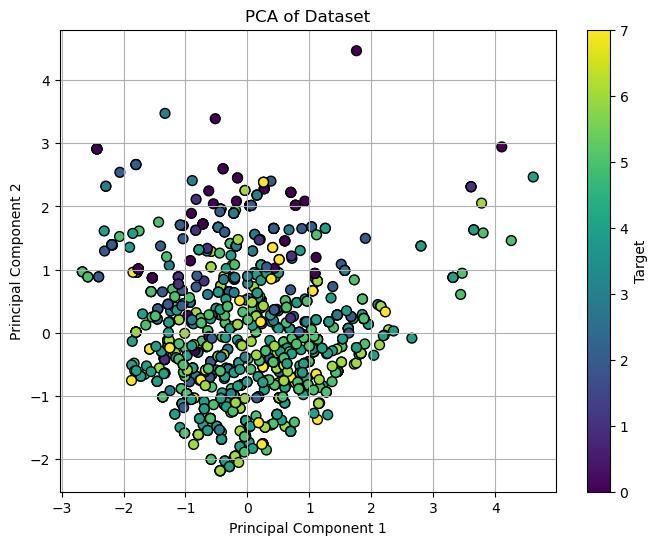

In [182]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_ny)

# PCA 수행 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_ny ,cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid()
plt.show()

In [183]:
components = pd.DataFrame(pca.components_, columns=X_ny.columns, index=['PC1', 'PC2'])
components

,Ship Mode,year,month,Weekday,num_Postal Code,BadWeather
PC1,0.150891,0.459955,-0.467269,0.518298,-0.342572,0.401678
PC2,-0.545257,-0.448016,-0.205039,0.492543,0.420121,0.202079


---
> 악천후 Feature의 영향은 Hurricane Feature보다 적어보인다.

In [241]:
ny_data['Hurricane'] = np.where(
    (ny_data['Ship Date']>='2015-01-26')&(ny_data['Ship Date']<='2015-01-29')|
    (ny_data['Ship Date']>='2016-01-22')&(ny_data['Ship Date']<='2016-01-25')|(ny_data['Ship Date']>='2016-10-08')&(ny_data['Ship Date']=='2016-10-15')|
    (ny_data['Ship Date']>='2017-03-14')&(ny_data['Ship Date']<='2017-03-16')|(ny_data['Ship Date']>='2017-09-19')&(ny_data['Ship Date']<='2017-09-22')|(ny_data['Ship Date']>='2017-10-28')&(ny_data['Ship Date']<='2017-10-31')|
    (ny_data['Ship Date']>='2018-09-08')&(ny_data['Ship Date']<='2018-09-12')|(ny_data['Ship Date']>='2018-10-11')&(ny_data['Ship Date']>='2018-10-14')
    ,
    1,
    0
)

In [242]:
# X_ny = ny_data[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'BadWeather']]
X_ny = ny_data[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'Hurricane']]
# X_ny = ny_data[['Ship Mode']]
# X_ny = ny_data[['Ship Mode', 'month', 'num_City', 'num_Postal Code', 'year']]
# X_ny = ny_data[['Ship Mode', 'month', 'Weekday', 'num_City', 'lat', 'lng', 'year']]
# X_ny = ny_data[['Ship Mode', 'month', 'Weekday', 'num_City', 'num_Postal Code']]
y_ny = ny_data['Shipping Duration']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [244]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9589311882295347
Test score: 0.8415720269724318


In [245]:
# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [246]:
gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.7924263649203733
Test score: 0.7338085182251007


In [247]:
et_model.fit(X_train, y_train)
print('Train score:',et_model.score(X_train,y_train))
print('Test score:',et_model.score(X_test,y_test))

Train score: 0.9768343480882516
Test score: 0.8433915355002832


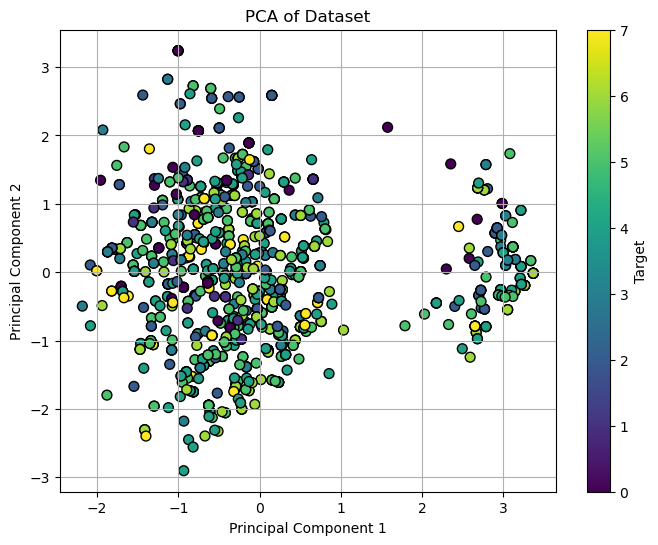

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_ny)

# PCA 수행 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_ny ,cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid()
plt.show()

In [214]:
components = pd.DataFrame(pca.components_, columns=X_ny.columns, index=['PC1', 'PC2'])
components

,Ship Mode,year,month,Weekday,num_Postal Code,Hurricane
PC1,0.06934,0.499987,0.456248,-0.225580,-0.070950,0.693630
PC2,-0.34030,-0.544801,0.505723,-0.381039,0.431552,0.014299


---
> BadWeather에서 Hurricane 겹치는 부분 제거

In [248]:
ny_data['Hurricane'] = np.where(
    (ny_data['Ship Date']>='2015-01-26')&(ny_data['Ship Date']<='2015-01-29')|
    (ny_data['Ship Date']>='2016-01-22')&(ny_data['Ship Date']<='2016-01-25')|(ny_data['Ship Date']>='2016-10-08')&(ny_data['Ship Date']=='2016-10-15')|
    (ny_data['Ship Date']>='2017-03-14')&(ny_data['Ship Date']<='2017-03-16')|(ny_data['Ship Date']>='2017-09-19')&(ny_data['Ship Date']<='2017-09-22')|(ny_data['Ship Date']>='2017-10-28')&(ny_data['Ship Date']<='2017-10-31')|
    (ny_data['Ship Date']>='2018-09-08')&(ny_data['Ship Date']<='2018-09-12')|(ny_data['Ship Date']>='2018-10-11')&(ny_data['Ship Date']>='2018-10-14')
    ,
    1,
    0
)

In [249]:
ny_data['BadWeather'] = np.where(
    (ny_data['Ship Date']>='2015-06-21')&(ny_data['Ship Date']=='2015-06-27')|
    (ny_data['Ship Date']>='2016-07-25')&(ny_data['Ship Date']=='2016-07-27')|(ny_data['Ship Date']>='2016-08-13')&(ny_data['Ship Date']=='2016-08-15')|
    (ny_data['Ship Date']>='2017-08-18')&(ny_data['Ship Date']<='2017-08-20')|   
    (ny_data['Ship Date']>='2018-01-04')&(ny_data['Ship Date']<='2018-01-06')|(ny_data['Ship Date']>='2018-03-02')&(ny_data['Ship Date']<='2018-03-04')|(ny_data['Ship Date']>='2018-05-04')&(ny_data['Ship Date']<='2018-05-06')|(ny_data['Ship Date']>='2018-05-15')&(ny_data['Ship Date']<='2018-05-17')
    ,
    1,
    0
)

---
### Hurricane + BadWeather

In [250]:
X_ny = ny_data[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'Hurricane', 'BadWeather']]
y_ny = ny_data['Shipping Duration']

In [251]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [254]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9578780028830892
Test score: 0.8422339942175977


In [255]:
# Decision Tree
dt_model = DecisionTreeRegressor()

# Gradient Boosting
gb_model = GradientBoostingRegressor()

# Gaussian Process
gpr_model = GaussianProcessRegressor()

# K-Neighbors
knn_model = KNeighborsRegressor()

# Extra Trees
et_model = ExtraTreesRegressor()

In [256]:
gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.791782585761018
Test score: 0.7326133880144687


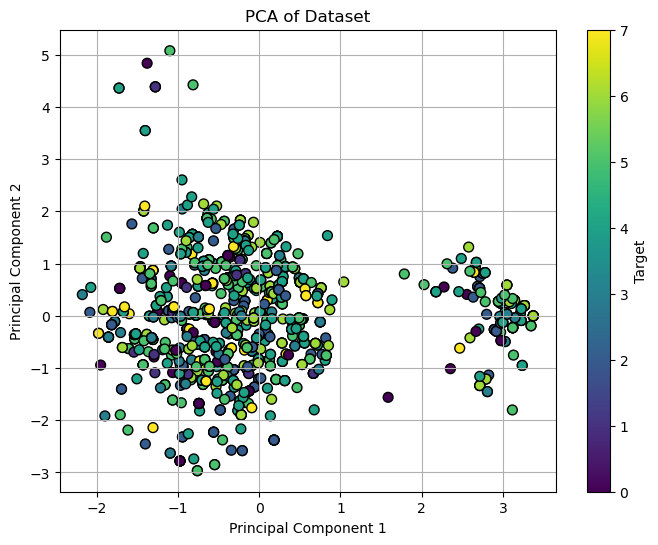

In [257]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_ny)

# PCA 수행 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_ny ,cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid()
plt.show()

In [258]:
components = pd.DataFrame(pca.components_, columns=X_ny.columns, index=['PC1', 'PC2'])
components

,Ship Mode,year,month,Weekday,num_Postal Code,Hurricane,BadWeather
PC1,0.074066,0.492336,0.458130,-0.231526,-0.063308,0.691471,-0.080573
PC2,0.160053,0.538784,-0.422676,0.422659,-0.444130,0.021995,0.359254


In [259]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                            cv=10, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [260]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score = best_model.score(X_test, y_test)
print("Test set r2_score:", r2_score)


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.7963306219171755
Test set r2_score: 0.840100323117586


---
### Hurricane

In [261]:
X_ny = ny_data[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'Hurricane']]
y_ny = ny_data['Shipping Duration']

In [262]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [263]:
rf=RandomForestRegressor(n_estimators=100)

rf.fit(X_train,y_train)
print('Train score:',rf.score(X_train,y_train))
print('Test score:',rf.score(X_test,y_test))

Train score: 0.9587054269994829
Test score: 0.8425473685649278


In [264]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.7924263649203733
Test score: 0.7335576791301777


In [265]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                            cv=10, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [266]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score = best_model.score(X_test, y_test)
print("Test set r2_score:", r2_score)


Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.7959971161164093
Test set r2_score: 0.8386042794181758


---
> Hurricane만 사용한 것보다 BadWeather를 함께 사용한 모델의 성능이 미세하게 좋았다.     
> 기존 모델보다 성능이 약간 떨어지는 이유는 실제 예측 편의를 위해 Weekday를 Order Date 기준으로 변경했기 때문인 것 같다.

---
- 군집 분리 데이터 확인
- 이상치 제거

In [269]:
# PCA 점수를 새로운 데이터프레임으로 변환
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)

# 오른쪽 군집 분리
sub_cluster = pca_df[principal_components[:, 0] >= 1.8]

# 메인 군집 분리
main_cluster = pca_df[(principal_components[:, 0] < 1.5) & (principal_components[:, 1] < 3)]

# 상단 이상치 분리
# top_outliers = pca[pca['PC2'] >= 4]

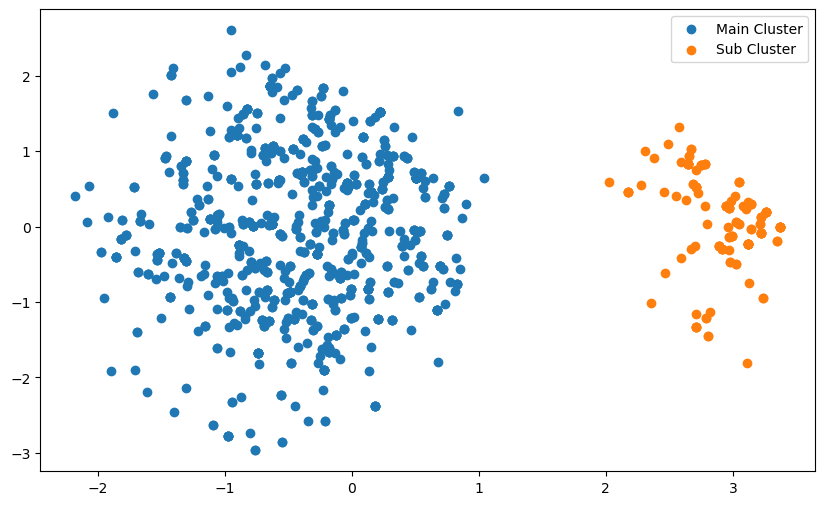

In [270]:
plt.figure(figsize=(10, 6))
plt.scatter(main_cluster['PC1'], main_cluster['PC2'], label='Main Cluster')
plt.scatter(sub_cluster['PC1'], sub_cluster['PC2'], label='Sub Cluster')
plt.legend()
plt.show()


In [271]:
sub_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 10 to 1075
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     137 non-null    float64
 1   PC2     137 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [272]:
main_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 941 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     941 non-null    float64
 1   PC2     941 non-null    float64
dtypes: float64(2)
memory usage: 22.1 KB


In [274]:
# 군집별 인덱스 추출
sub_cluster_idx = pca_df[pca_df['PC1'] >= 1.8].index
main_cluster_idx = pca_df[(pca_df['PC1'] < 1.5) & (pca_df['PC2'] < 3)].index

# 원본 데이터에서 해당 인덱스의 모든 컬럼 확인
sub_cluster_original =  ny_data.iloc[sub_cluster_idx]
main_cluster_original = ny_data.iloc[main_cluster_idx]

In [276]:
sub_cluster_original.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,Postal Code,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Duration,lng,lat,month,Weekday,year,num_City,num_Postal Code,postal+City,BadWeather,Hurricane
10,CA-2018-161018,2018-11-09,2018-11-11,2,PN-18775,Home Office,New York City,10009,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.53,2,-73.978639,40.72641,11,4,2018,9,0,"New York City,10009",0,1
11,CA-2018-146780,2018-12-25,2018-12-30,3,CV-12805,Corporate,New York City,10035,FUR-FU-10001934,Furniture,Furnishings,Magnifier Swing Arm Lamp,41.96,5,-73.921782,40.79350,12,1,2018,9,3,"New York City,10035",0,1
20,CA-2018-163139,2018-12-01,2018-12-03,2,CC-12670,Consumer,New York City,10009,TEC-AC-10000290,Technology,Accessories,Sabrent 4-Port USB 2.0 Hub,20.37,2,-73.978639,40.72641,12,5,2018,9,0,"New York City,10009",0,1
21,CA-2018-163139,2018-12-01,2018-12-03,2,CC-12670,Consumer,New York City,10009,OFF-ST-10002790,Office Supplies,Storage,Safco Industrial Shelving,221.55,2,-73.978639,40.72641,12,5,2018,9,0,"New York City,10009",0,1
22,CA-2018-163139,2018-12-01,2018-12-03,2,CC-12670,Consumer,New York City,10009,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,17.52,2,-73.978639,40.72641,12,5,2018,9,0,"New York City,10009",0,1


In [278]:
print(sub_cluster_original['num_City'].unique())
print(sub_cluster_original['num_Postal Code'].unique())
print(sub_cluster_original['Hurricane'].unique())
print(sub_cluster_original['Category'].unique())

[ 9  0  6 11 12 17 15  1 16]
[ 0  3  2 13  1  9 10 19  5 15 17 16]
[1]
[0]
['Furniture' 'Technology' 'Office Supplies']


In [280]:
print(main_cluster_original['Hurricane'].unique())
print(main_cluster_original['Hurricane'].value_counts())

[0 1]
Hurricane
0    939
1      2
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

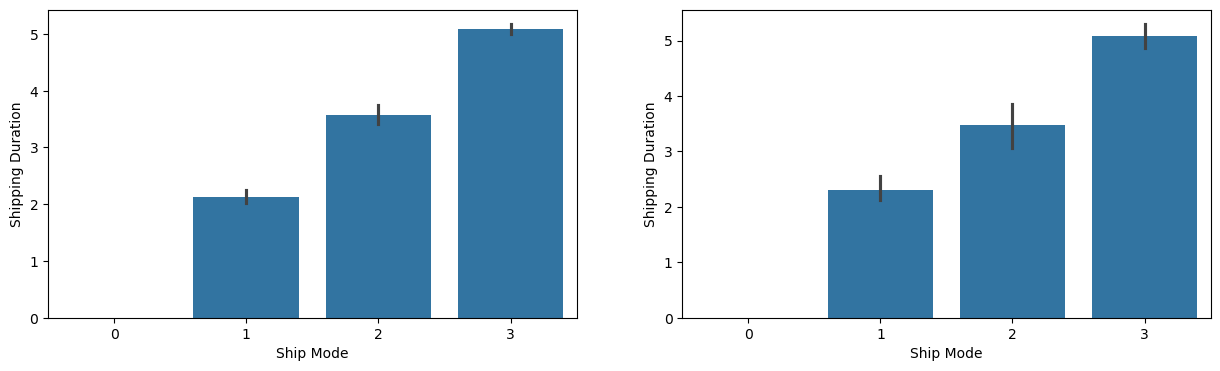

In [282]:
plt.figure(figsize=(12, 6))
fig=plt.figure(figsize=(15,4))

ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

sns.barplot(x='Ship Mode', y='Shipping Duration', data=main_cluster_original, ax=ax1)
sns.barplot(x='Ship Mode', y='Shipping Duration', data=sub_cluster_original, ax=ax2)
plt.show()

In [284]:
print('Main')
print(main_cluster_original.loc[main_cluster_original['Ship Mode']==0, 'Shipping Duration'].mean())
print(main_cluster_original.loc[main_cluster_original['Ship Mode']==1, 'Shipping Duration'].mean())
print(main_cluster_original.loc[main_cluster_original['Ship Mode']==2, 'Shipping Duration'].mean())
print(main_cluster_original.loc[main_cluster_original['Ship Mode']==3, 'Shipping Duration'].mean())
print()
print('Sub')
print(sub_cluster_original.loc[sub_cluster_original['Ship Mode']==0, 'Shipping Duration'].mean())
print(sub_cluster_original.loc[sub_cluster_original['Ship Mode']==1, 'Shipping Duration'].mean())
print(sub_cluster_original.loc[sub_cluster_original['Ship Mode']==2, 'Shipping Duration'].mean())
print(sub_cluster_original.loc[sub_cluster_original['Ship Mode']==3, 'Shipping Duration'].mean())

Main
0.0
2.130718954248366
3.572289156626506
5.086267605633803

Sub
0.0
2.3125
3.4722222222222223
5.075949367088608


In [286]:
main_cluster_original['Weekday'].unique()
sub_cluster_original['Weekday'].unique()

array([4, 1, 5, 0, 2, 3, 6], dtype=int32)

In [288]:
len(main_cluster_original['num_Postal Code'].unique())

21

---
> Sub data의 배송지 시각화

In [297]:
standard_ship = sub_cluster_original[sub_cluster_original['Ship Mode']==3]

average_shipping_duration = standard_ship.groupby('Postal Code')['Shipping Duration'].mean().reset_index()

# lng와 lat 정보 추가 (이미 데이터에 있다고 가정)
average_shipping_duration = average_shipping_duration.merge(
    sub_cluster_original[['Postal Code', 'lat', 'lng']].drop_duplicates(),
    on='Postal Code',
    how='left'
)

In [298]:
import folium
from folium.plugins import MarkerCluster

# 미국 중심 좌표로 지도 생성
us_map = folium.Map(location=[42.9538, -75.5268], zoom_start=6)

# 각 도시에 대한 CircleMarker 추가
for _, row in average_shipping_duration.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lng']],
        radius=min(row['Shipping Duration'] * 2, 20),  # 배송 기간에 따라 크기 조정
        popup=f"Postal Code: {row['Postal Code']}<br>Avg Shipping Duration: {row['Shipping Duration']:.2f} days",
        color='green',
        fill=True,
        fillColor='green',
        fillOpacity=0.7,
        weight=2
    ).add_to(us_map)

us_map

In [299]:
sub_cluster_original['num_Postal Code'].unique()

array([ 0,  3,  2, 13,  1,  9, 10, 19,  5, 15, 17, 16])

In [303]:
from scipy import stats

# F-test 수행
f_statistic = np.var(sub_cluster_original['Shipping Duration']) / np.var(main_cluster_original['Shipping Duration'])
df1 = len(sub_cluster_original) - 1  # sub_data의 자유도
df2 = len(main_cluster_original) - 1  # main_data의 자유도
p_value = stats.f.cdf(f_statistic, df1, df2)

print('F-statistic:', f_statistic)
print('p-value:', p_value)


F-statistic: 0.891756403468453
p-value: 0.20115426478029597


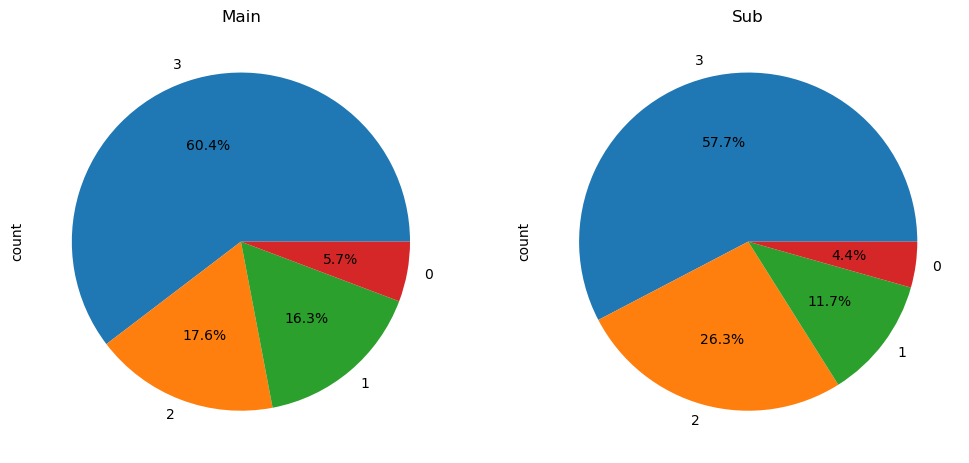

In [311]:
fig = plt.figure(figsize=(12, 6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

main_cluster_original['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax1, title='Main')
sub_cluster_original['Ship Mode'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax2, title='Sub')
plt.show()

In [305]:
main_cluster_original['Ship Mode'].value_counts()

Ship Mode
3    568
2    166
1    153
0     54
Name: count, dtype: int64

In [312]:
sub_postal = sub_cluster_original[['Postal Code', 'num_Postal Code']].groupby(['num_Postal Code'])

In [315]:
sub_postal.value_counts().sort_values(ascending=False)

num_Postal Code  Postal Code
2                10024          32
0                10009          31
3                10035          31
1                10011          23
19               14609           8
10               11572           3
5                10701           2
9                11561           2
17               14215           2
13               13021           1
15               13501           1
16               13601           1
Name: count, dtype: int64

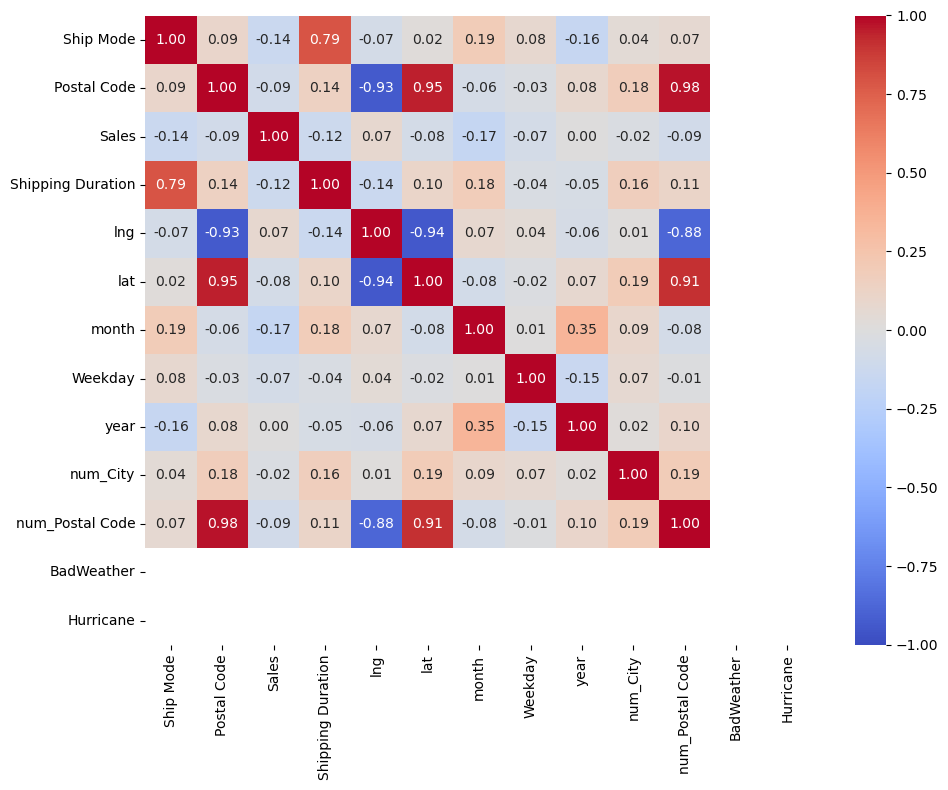

In [316]:
corr_matrix=sub_cluster_original.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.tight_layout()
plt.show()

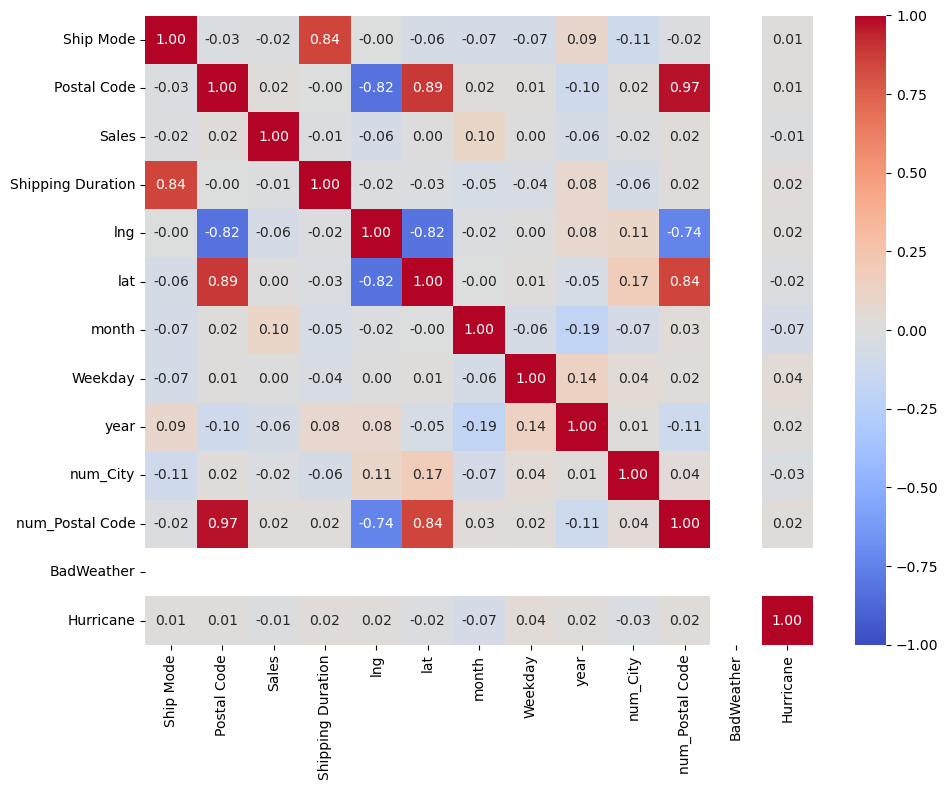

In [318]:
corr_matrix=main_cluster_original.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1,
            fmt='.2f')
plt.tight_layout()
plt.show()

---
### 모델 저장

In [356]:
X_ny = ny_data[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'Hurricane', 'BadWeather']]
y_ny = ny_data['Shipping Duration']

In [439]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [440]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.791782585761018
Test score: 0.7323089589682656


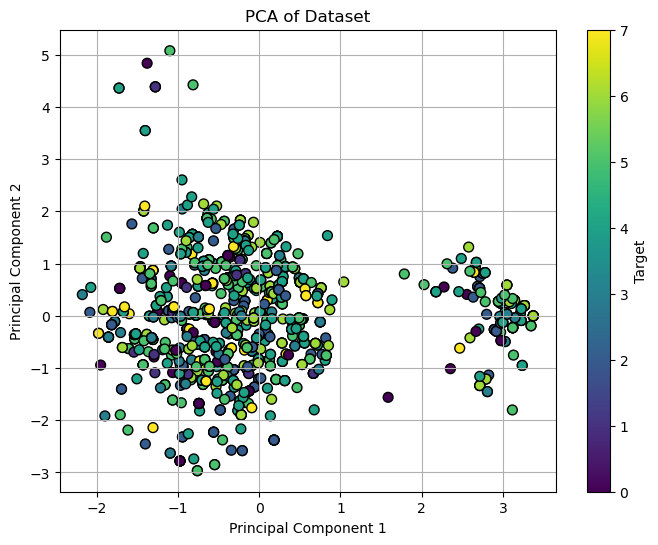

In [411]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
data_scaled = scaler.fit_transform(X_ny)

# PCA 수행 (2개의 주성분으로 축소)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=y_ny ,cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.grid()
plt.show()

In [441]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                            cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [442]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score = best_model.score(X_test, y_test)
print("Test set r2_score:", r2_score)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.7946450814966992
Test set r2_score: 0.841479165867218


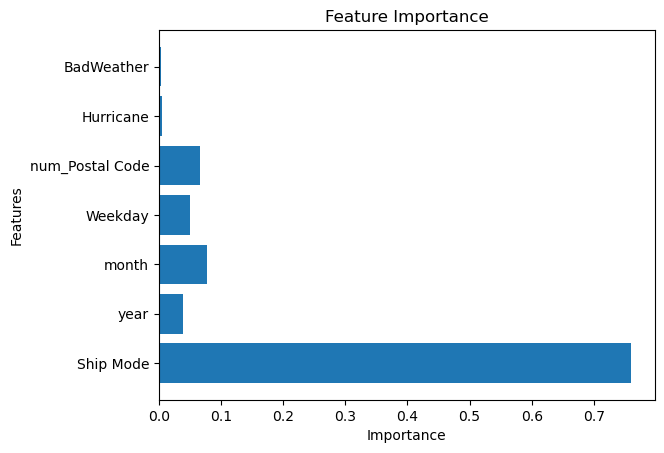

In [443]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [444]:
# PCA 점수를 새로운 데이터프레임으로 변환
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1', 'PC2']
)

# 두 조건을 or(|)로 연결
cluster_idx = pca_df[(pca_df['PC1'] >= 1.8) | 
                    ((pca_df['PC1'] < 1.5) & (pca_df['PC2'] < 3))].index

# main + sub
ny_cluster = ny_data.iloc[cluster_idx]

In [445]:
ny_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1078 entries, 0 to 1089
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order ID           1078 non-null   object        
 1   Order Date         1078 non-null   datetime64[ns]
 2   Ship Date          1078 non-null   datetime64[ns]
 3   Ship Mode          1078 non-null   int64         
 4   Customer ID        1078 non-null   object        
 5   Segment            1078 non-null   object        
 6   City               1078 non-null   object        
 7   Postal Code        1078 non-null   int64         
 8   Product ID         1078 non-null   object        
 9   Category           1078 non-null   object        
 10  Sub-Category       1078 non-null   object        
 11  Product Name       1078 non-null   object        
 12  Sales              1078 non-null   float64       
 13  Shipping Duration  1078 non-null   int64         
 14  lng          

In [446]:
ny_cluster.reset_index(inplace=True)

In [447]:
ny_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              1078 non-null   int64         
 1   Order ID           1078 non-null   object        
 2   Order Date         1078 non-null   datetime64[ns]
 3   Ship Date          1078 non-null   datetime64[ns]
 4   Ship Mode          1078 non-null   int64         
 5   Customer ID        1078 non-null   object        
 6   Segment            1078 non-null   object        
 7   City               1078 non-null   object        
 8   Postal Code        1078 non-null   int64         
 9   Product ID         1078 non-null   object        
 10  Category           1078 non-null   object        
 11  Sub-Category       1078 non-null   object        
 12  Product Name       1078 non-null   object        
 13  Sales              1078 non-null   float64       
 14  Shipping

In [448]:
X_ny = ny_cluster[['Ship Mode', 'year', 'month', 'Weekday', 'num_Postal Code', 'Hurricane', 'BadWeather']]
y_ny = ny_cluster['Shipping Duration']

In [457]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ny, 
    y_ny, 
    test_size=0.2, 
    random_state=42
)

In [458]:
# Gradient Boosting
gb_model = GradientBoostingRegressor()

gb_model.fit(X_train, y_train)
print('Train score:',gb_model.score(X_train,y_train))
print('Test score:',gb_model.score(X_test,y_test))

Train score: 0.8009259175298384
Test score: 0.7311203154029984


In [453]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                            cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [454]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2_score = best_model.score(X_test, y_test)
print("Test set r2_score:", r2_score)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score: 0.800914328730132
Test set r2_score: 0.8227944044839456


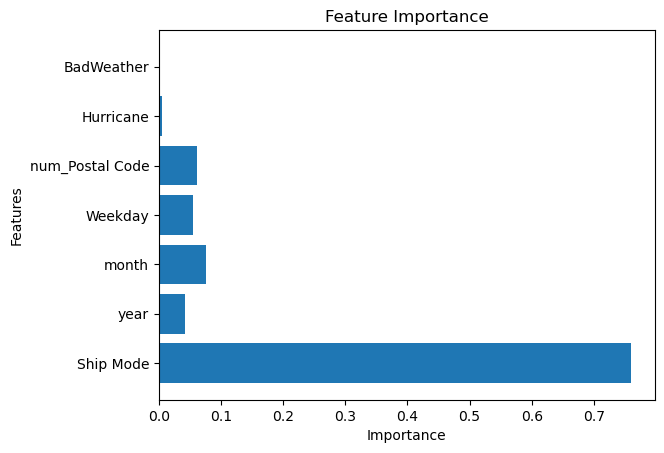

In [459]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [460]:
from joblib import dump

# dump(best_model, '../Transport/model/cluster_ny_gb.joblib')

['../Transport/model/cluster_ny_gb.joblib']